In [1]:
import RMS_utils
train_dir, validation_dir, class_weight = RMS_utils.prep_dir("RMS Myod1/")


No. ARMS Train: 90
No. ERMS Train: 225
No. ARMS Validation: 40
No. ERMS Validation: 103
{0: 1.0, 1: 0.4}
{0: 1.0, 1: 0.4}


In [2]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras import layers, models, activations

conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.35))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 4, 4, 1536)        54336736  
_________________________________________________________________
dense (Dense)                (None, 4, 4, 1024)        1573888   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 1024)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [3]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model.compile(optimizer = Adam(lr=0.00007), loss = 'binary_crossentropy', metrics = ['AUC'])

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0/255., 
                                   rotation_range = 360,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.0,
                                   shear_range = 0.0,
                                   zoom_range = 0.0,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode='wrap')


train_generator, validation_generator = RMS_utils.prep_datagen(train_dir, validation_dir, train_datagen, 10, 200)

Found 315 images belonging to 2 classes.
Found 143 images belonging to 2 classes.


In [41]:
history = model.fit(train_generator,
                              validation_data = validation_generator,
                              epochs = 1,
                              verbose = 1,
                              class_weight=class_weight
                   )

32/32 [==============================] - 5s 170ms/step - loss: 0.0726 - auc: 0.9899 - val_loss: 0.2564 - val_auc: 0.9547


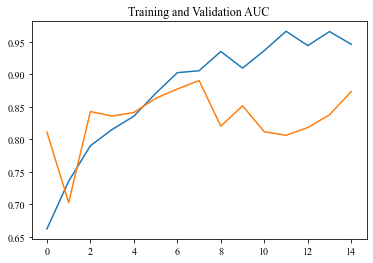

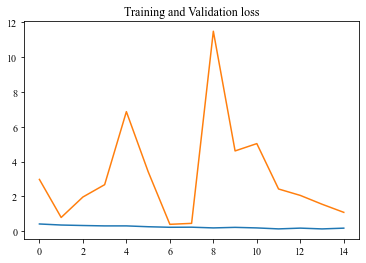

In [9]:
RMS_utils.show_results(history, save = True)

In [42]:
RMS_utils.show_preds(model, validation_generator)

Confusion Matrix
[[33  7]
 [ 6 97]]
              precision    recall  f1-score   support

        ARMS       0.85      0.82      0.84        40
        ERMS       0.93      0.94      0.94       103

    accuracy                           0.91       143
   macro avg       0.89      0.88      0.89       143
weighted avg       0.91      0.91      0.91       143



In [43]:
#Save Model to use in visualisations and get auc
import pickle

model.save('Saved Model - MYoD1 .91')
with open('Saved Model History - MYoD1 .91', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Saved Model - MYoD1 .91\assets
